# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [15]:
PROJECT_ROOT_DIR = "./"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img")
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data")
os.makedirs(IMAGES_PATH, exist_ok=True)
os.makedirs(DATA_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def load_csv(path=DATA_PATH, fich="ex1data1.csv"):
    os.makedirs(path, exist_ok=True)
    csv_path = os.path.join(path,fich)
    datos = pd.read_csv(csv_path, header=None).values
    return datos.astype(float) 


In [16]:
datos = load_csv(fich="ex1data1.csv")
type(datos)

numpy.ndarray

In [17]:
X = datos[:, :-1] #Coge desde la primera hasta la ultima columna (no incluida) 
np.shape(X) # (97, 1)
Y = datos[:, -1] #Coge la ultima columna
np.shape(Y) # (97,)

m = np.shape(X)[0]
n = np.shape(X)[1]


X = np.hstack([np.ones([m,1]),X])

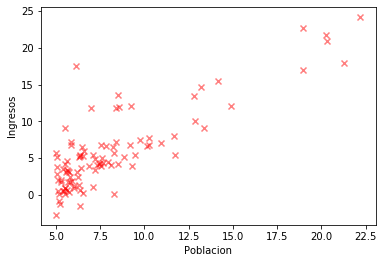

In [18]:
plt.figure()
plt.scatter(X[:,-1], Y, c='r', marker='x', alpha=0.5)
plt.ylabel("Ingresos")
plt.xlabel("Poblacion")
plt.show()

Regresion lineal a mano, probando valores 

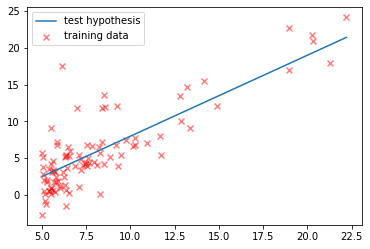

In [7]:
x = np.linspace(min(X[:,-1]), max(X[:,-1]))
y_test = -3 + 1.1*x

plt.scatter(X[:,-1], Y, c='r', marker='x', alpha=0.5, label="training data")
plt.plot(x,y_test, label="test hypothesis")
plt.legend()
plt.show()

Hacer una regresion tras prueba y error lleva varios minutos en un caso sencillo, para uno complejo puede ser imposible realizarlo a mano 

Para calcular el coste de la funcion (el error que tiene con los valores) usamos una funcion de costa, en este caso **Error Cuadratico** 

Cost function (squared error function)

$J(\theta_{0},\theta_{1}) = \frac{1}{2m} \sum_{i=1}^{m}{(h_{\theta}(x^{(i)}) - y^{(i)})^{2}}$

Los valores de Theta seran los usados en la funcion $f_{w,b}(x) = wx + b $

Empezar con algun valor para $\theta_{0},\theta_{1}$ por ejemplo (0,0) o valores aleatorios

Theta final: [-3.61233782  1.16455871]
Coste final: 4.484285479429123
Saving figure Hypothesis_1var


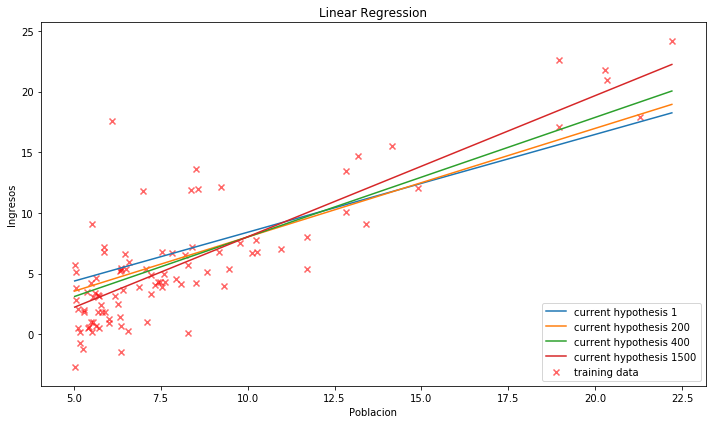

In [19]:
def coste(X, Y, Theta):
    H = np.dot(X, Theta)
    Aux = (H - Y) ** 2
    return Aux.sum() / (2* len(X))

def gradiente(X, Y, Theta, alpha):
    NuevaTheta = Theta
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    H = np.dot(X, Theta)
    Aux = (H - Y)
    for i in range(n):
        Aux_i = Aux * X[:, i]
        NuevaTheta -= (alpha / m) * Aux_i.sum()
    return NuevaTheta

def descenso_gradiente(X,Y,alpha,Theta):
    NuevaTheta = Theta
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    H = np.dot(X, Theta)
    Aux = (H - Y)
    for i in range(n):
        Aux_i = Aux * X[:, i]
        NuevaTheta[i] -= (alpha / m) * Aux_i.sum()
    return NuevaTheta, coste(X,Y,Theta)


mostrar = [1,200,400,1500]
plt.figure(figsize=(10,6))

alpha = 0.01
Theta = np.array([np.random.random(),np.random.random()])

thetas_0 = []
thetas_1 = []
costes_list = []

for i in range(1500):
        Theta, costes = descenso_gradiente(X,Y,alpha,Theta)
        costes_list.append(costes)
        thetas_0.append(Theta[0])
        thetas_1.append(Theta[1])
        if i+1 in mostrar:
            y = Theta[0] + Theta[1]*x
            plt.plot(x,y, label="current hypothesis {}".format(i+1))
            #plt.show()
print("Theta final:",Theta)
print("Coste final:",costes)

plt.scatter(X[:,-1], Y, c='r', marker='x', alpha=0.6, label="training data")
plt.legend(loc='lower right')
plt.title("Linear Regression")
plt.xlabel("Poblacion")
plt.ylabel("Ingresos")
save_fig("Hypothesis_1var")
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
def train(x, y): 
    model = LinearRegression().fit(x,y)
    return model
model = train(X, Y)
x_new = 13.0
y_model = Theta[0] + Theta[1]*x_new
y_sk = model.predict([[x_new,x_new]]) #X shape is (97,2)? -> predict [x,x]?
print("Value of X = {}\nValue predicted with sklearn: {}".format(x_new,y_sk[0]),"\nValue predicted with our model:", y_model)

Value of X = 13.0
Value predicted with sklearn: 11.613656496152858 
Value predicted with our model: 11.517169089388753


In [10]:
def make_data(t0_range, t1_range, X, Y):
    """Genera las matrices X,Y,Z para generar un plot en 3D
    """
    print(t0_range,t1_range)
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    # Theta0 y Theta1 tienen las misma dimensiones, de forma que
    # cogiendo un elemento de cada uno se generan las coordenadas x,y
    # de todos los puntos de la rejilla
    Coste = np.empty_like(Theta0)
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = coste(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])
    return [Theta0, Theta1, Coste]

In [11]:
Theta0, Theta1, Coste = make_data([min(thetas_0), max(thetas_0)],[min(thetas_1), max(thetas_1)], X, Y)

[-3.5804532901161985, 0.818206566310179] [0.7214573258302748, 1.161355567654227]


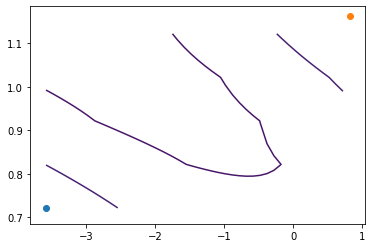

In [12]:
plt.scatter([min(thetas_0)], [min(thetas_1)])
plt.scatter([max(thetas_0)], [max(thetas_1)])
plt.contour(Theta0,Theta1,Coste, np.logspace(-4,2,30))
plt.show()

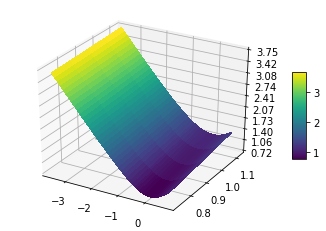

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
#XX, YY = np.meshgrid(thetas_0,thetas_1)
XX, YY = Theta0, Theta1
R = np.sqrt(XX**2 + YY**2)
Z = np.sin(R)
surf = ax.plot_surface(XX,YY,R, cmap=cm.viridis, linewidth=0, antialiased=False)
#ax.set_zlim(-1.01,1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.4, aspect=6)

plt.show()

# Linear Regression with multiple variables

In [14]:
datos = load_csv(fich="ex1data2.csv")